### 크롤링 (Crawling)

- Crawl: 긁어오다.
- 다양한 사이트들의 데이터들을 직접 수집해보면서 실습
- 데이터를 긁어오는 행위 뿐만 아니라 로그인, 자료다운로드 및 클릭 행위도 가능

### 필요 라이브러리 설치
- selenium
- chrome-driver

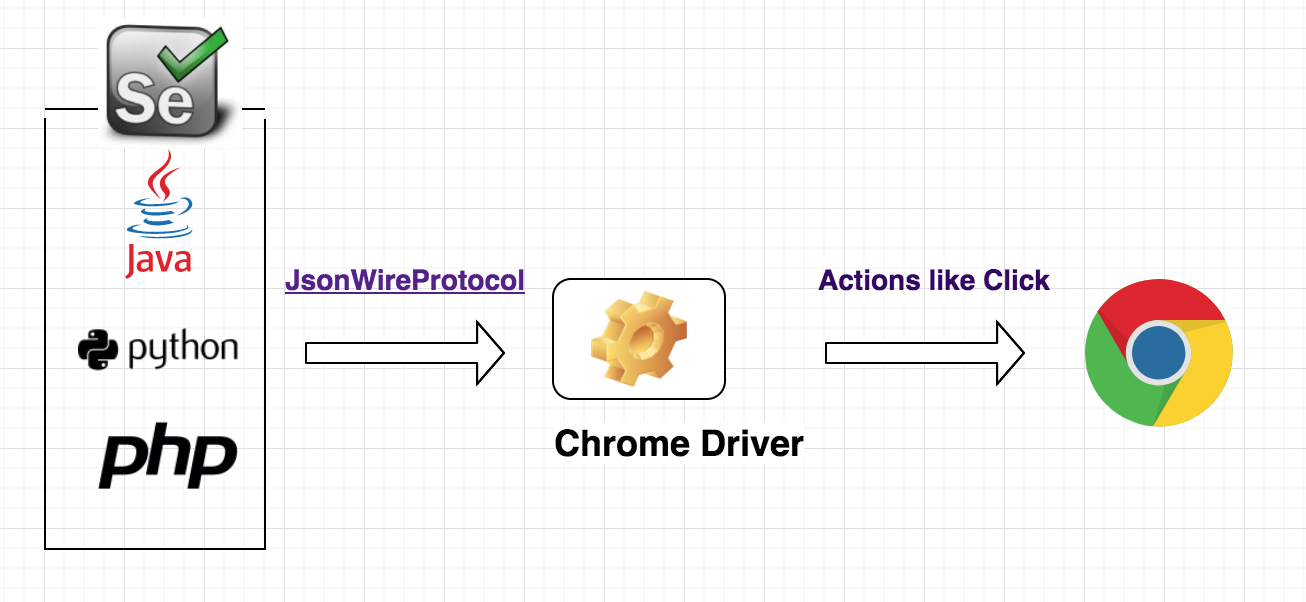

### 내 컴퓨터(로컬)에서 실행시

In [2]:
# (1) 크롤링에 필요한 파이썬 라이브러리 설치
%pip install webdriver-manager selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
# (2) 크롬 드라이버 자동 다운로드 => 특정 경로에 최신 버전의 크롬 드라이버가 설치됨.
from webdriver_manager.chrome import ChromeDriverManager
ChromeDriverManager().install()

'/Users/inseop/.wdm/drivers/chromedriver/mac64/132.0.6834.111/chromedriver-mac-x64/THIRD_PARTY_NOTICES.chromedriver'

In [4]:
# 크롬 브라우저 실행
from selenium import webdriver
browser = webdriver.Chrome()

In [5]:
# browser 이동시켜 (get) => url
browser.get("http://www.naver.com")

### 네이버 날씨
- https://weather.naver.com/

**1. browser.get(url)**
- 해당 url로 이동해줘!
- 브라우저를 내가 가져오고자하는 정보가 있는 사이트로 이동을 시킨다.

In [6]:
url = 'https://weather.naver.com/'
browser.get(url)

In [7]:
browser.title

'네이버 날씨 홈'

**2. find_element()**

- find_element는 Selenium이 웹 페이지 내에서 특정 요소를 찾는 데 사용하는 함수입니다.
- 이 함수는 단일 요소를 반환하며, 지정한 조건에 맞는 첫 번째 요소만 반환합니다. 만약 페이지에 해당하는 - 요소가 여러 개 있을 경우, 첫 번째 것만 가져오고 나머지는 무시됩니다.
- find_element는 특정 요소를 찾을 수 없다면 NoSuchElementException을 발생시킵니다.


**3. By.CLASS_NAME()**
- By.CLASS_NAME은 HTML 요소에서 특정 클래스 이름을 기준으로 요소를 찾는 방법입니다.
- HTML에서 <'div class="current"></div'> 같은 구조가 있을 때, current라는 클래스 이름을 기준으로 해당 요소를 찾을 수 있습니다.


In [13]:
# '현재 온도\n16.9°'
from selenium.webdriver.common.by import By
browser.find_element(By.CLASS_NAME, 'current').text.split('\n')[1]

'6.8°'

In [18]:
# 미션(1): 습도, 체감온도, 풍향 데이터 수집
browser.find_element(By.CLASS_NAME, 'weather_table').text.split(' ')

['습도', '22%', '체감', '6.0°', '북서풍', '1.5m/s']

In [25]:
# 미션(2): 나의 위치, 맑음, 어제와의 온도차이
browser.find_element(By.CLASS_NAME, 'location_name').text # 나의 위치

# 싱글데이터
browser.find_element(By.CLASS_NAME, 'summary').text

'맑음\n어제보다 0.4°\n낮아요'

### 삼성전자 주가 데이터

In [26]:
# 네이버: '삼성전자 주가' 검색 => URL 복사
url = 'https://search.naver.com/search.naver?ie=UTF-8&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90+%EC%A3%BC%EA%B0%80&sm=chr_hty'

browser.get(url)
browser.title

'삼성전자 주가 : 네이버 검색'

In [28]:
# 삼성전자의 금일 가격 데이터를 수집해 봅시다.
browser.find_element(By.CLASS_NAME, 'spt_con').text

'지수\n54,000\n전일대비\n하락 300 (-0.55%)'

### 네이버 부동산
- https://land.naver.com/
- 미션) 근처 아파트 현재 실거래 가격 가져오기

In [32]:
from selenium import webdriver

browser = webdriver.Chrome()

In [33]:
url = 'https://new.land.naver.com/search?ms=37.5249623,127.0277586,16&a=APT:ABYG:JGC:PRE&e=RETAIL&ad=true'
browser.get(url)

In [36]:
browser.find_element(By.CLASS_NAME, 'complex_price--trade').text

'최근 매매 실거래가\n55억\n2024.11.09, 4층, 163㎡'

호가 데이터도 함께 수집을 해봅시다.

In [42]:
# 첫 번째 매물의 (1) 동정보 (2) 가격 (3) 매물 정보
동정보 = browser.find_element(By.CLASS_NAME, 'item_title').text
가격 = browser.find_element(By.CLASS_NAME, 'price_line').text
매물정보 = browser.find_element(By.CLASS_NAME, 'info_area').text

- 여기까지가 싱글데이터 수집 방법
- 멀티데이터 => 즉, 전부를 다 가져오는 방법

In [53]:
# find_elements() => 해당 클래스 이름이 동이한 요소는 전부다 가져와
data = browser.find_elements(By.CLASS_NAME, 'price_line')

for i in data:
    print(i.text)

전세9억
전세9억 5,000
전세9억 5,000
월세7억/100
매매60억
전세16억~17억
전세12억 5,000
매매65억
전세8억 5,000
매매65억
매매58억~60억
매매60억
월세1억/560~2억/500
전세17억
월세1억/560
전세9억 5,000
전세12억 5,000
월세7억/100
월세9억/240~10억/200
전세9억 5,000


In [47]:
data = ['요소1', '요소2', '요소3']

for i in data:
    print(i)

요소1
요소2
요소3


In [66]:
# 컨테이너를 수집해서 => 각개격파

data = browser.find_elements(By.CLASS_NAME, 'item')
data_list = []

for i in data:
    try:
        동정보 = i.find_element(By.CLASS_NAME, 'item_title').text
        가격 = i.find_element(By.CLASS_NAME, 'price_line').text
        매물정보 = i.find_element(By.CLASS_NAME, 'info_area').text
    except:
        continue

    data_list.append({
        '동정보':동정보,
        '가격':가격,
        '매물정보':매물정보
    })

    print(동정보, 가격, 매물정보)

미성1차 3동 전세9억 아파트112B/105m², 3/14층, 남향
미성1차 3동 전세9억 5,000 아파트112B/105m², 8/14층, 남향
미성1차 3동 전세9억 5,000 아파트111A/105m², 11/14층, 남향
34 올수리된 전세집 학군우수 주차편리 한강조망
미성1차 3동 월세7억/100 아파트112B/105m², 8/14층, 남향
미성1차 2동 매매60억 아파트163C/153m², 3/14층, 남향
50 압구정 최고의 대지지분으로 재건축 투자 유망 주차편리 한강인접동
미성1차 1동 전세16억~17억 아파트193B/180m², 14/14층, 남향
미성1차 2동 전세12억 5,000 아파트163D/153m², 5/14층, 남향
미성1차 1동 매매65억 아파트193A/180m², 고/14층, 남향
58 특올수리 최고의 대지지분 최고의 투자가치 전망 우수
미성1차 3동 전세8억 5,000 아파트112B/105m², 10/14층, 남향
체크 34P 주인용 특A급 올수리I 주차 가장 넉넉I 빌트인 가전I대출X
미성1차 1동 매매65억 아파트193C/185m², 13/14층, 남향
미성1차 2동 매매58억~60억 아파트163D/153m², 8/14층, 남향
미성1차 2동 매매60억 아파트163E/153m², 저/14층, 남향
미성1차 1동 월세1억/560~2억/500 아파트193A/180m², 2/14층, 남향
미성1차 1동 전세17억 아파트193B/180m², 14/14층, 남향
실매물 58 l 올수리 l 컨디션 굿 l 확장ok l 스케줄 조정 필수
미성1차 1동 월세1억/560 아파트193A/180m², 2/14층, 남향
미성1차 3동 전세9억 5,000 아파트112B/105m², 8/14층, 남향
34 강추 거실확장 신규올수리 구조좋은 귀한34형 주차편리해요
미성1차 2동 전세12억 5,000 아파트163E/153m², 5/14층, 남향
미성1차 3동 월세7억/100 아파트112B/105m², 8/14층, 남향
미성1차 2동 월세9억/240~10억/

In [63]:
data_list

[{'동정보': '미성1차 3동', '가격': '전세9억', '매물정보': '아파트112B/105m², 3/14층, 남향'},
 {'동정보': '미성1차 3동', '가격': '전세9억 5,000', '매물정보': '아파트112B/105m², 8/14층, 남향'},
 {'동정보': '미성1차 3동',
  '가격': '전세9억 5,000',
  '매물정보': '아파트111A/105m², 11/14층, 남향\n34 올수리된 전세집 학군우수 주차편리 한강조망'},
 {'동정보': '미성1차 3동', '가격': '월세7억/100', '매물정보': '아파트112B/105m², 8/14층, 남향'},
 {'동정보': '미성1차 2동',
  '가격': '매매60억',
  '매물정보': '아파트163C/153m², 3/14층, 남향\n50 압구정 최고의 대지지분으로 재건축 투자 유망 주차편리 한강인접동'},
 {'동정보': '미성1차 1동', '가격': '전세16억~17억', '매물정보': '아파트193B/180m², 14/14층, 남향'},
 {'동정보': '미성1차 2동', '가격': '전세12억 5,000', '매물정보': '아파트163D/153m², 5/14층, 남향'},
 {'동정보': '미성1차 1동',
  '가격': '매매65억',
  '매물정보': '아파트193A/180m², 고/14층, 남향\n58 특올수리 최고의 대지지분 최고의 투자가치 전망 우수'},
 {'동정보': '미성1차 3동',
  '가격': '전세8억 5,000',
  '매물정보': '아파트112B/105m², 10/14층, 남향\n체크 34P 주인용 특A급 올수리I 주차 가장 넉넉I 빌트인 가전I대출X'},
 {'동정보': '미성1차 1동', '가격': '매매65억', '매물정보': '아파트193C/185m², 13/14층, 남향'},
 {'동정보': '미성1차 2동', '가격': '매매58억~60억', '매물정보': '아파트163D/153m², 8/14층, 남향'},
 {'동정보': '미성1차

In [67]:
import pandas as pd # 파이썬 데이터 분석 시 사용하는 라이브러리

df = pd.DataFrame(data_list)
df.to_csv('미성1차_매물데이터.csv', encoding='utf-8-sig')

## 구글 뉴스 크롤링

- API로 제공되는 정보의 한계 => 커스텀

In [68]:
# 구글 뉴스 검색으로 이동
url = 'https://www.google.com/search?q=%EC%83%9D%EC%84%B1%ED%98%95AI+%EC%84%9C%EB%B9%84%EC%8A%A4&newwindow=1&sca_esv=3caead4b194ccc5f&tbm=nws&sxsrf=ADLYWIJihZwMPlGoKthMO8dX6fX03zkAPA:1737614297534&source=lnt&tbs=sbd:1&sa=X&ved=2ahUKEwiW9dfXnYuLAxVns1YBHTiXOEcQpwV6BAgBEBQ&biw=2150&bih=1241&dpr=1.6'
browser.get(url) # 해당 url로 페이지 이동

browser.title

'생성형AI 서비스 - Google 검색'

In [76]:
# 첫 번째 미션 (싱글데이터)
# - 첫 번째 뉴스의 제목, 내용, 언론사, 작성시간, 링크

browser.find_element(By.CLASS_NAME, 'n0jPhd').text # 제목
browser.find_element(By.CLASS_NAME, 'GI74Re').text # 내용
browser.find_element(By.CLASS_NAME, 'MgUUmf').text # 언론사
browser.find_element(By.CLASS_NAME, 'rbYSKb').text # 작성시간
browser.find_element(By.CLASS_NAME, 'WlydOe').get_attribute('href') # 링크

'https://www.lawtimes.co.kr/LawFirm-NewsLetter/205020'

In [82]:
# 두 번째 미션 (멀티데이터) => 컨테이너 => 각개격파
# - 1페이지 전체 뉴스의 제목, 내용, 언론사, 작성시간, 링크

data = browser.find_elements(By.CLASS_NAME, 'SoaBEf')
data_list = []

for i in data:
    제목 = i.find_element(By.CLASS_NAME, 'n0jPhd').text # 제목
    내용 = i.find_element(By.CLASS_NAME, 'GI74Re').text # 내용
    언론사 = i.find_element(By.CLASS_NAME, 'MgUUmf').text # 언론사
    작성시간 = i.find_element(By.CLASS_NAME, 'rbYSKb').text # 작성시간
    링크 = i.find_element(By.CLASS_NAME, 'WlydOe').get_attribute('href') # 링크

    data_list.append({
        '제목':제목,
        '내용':내용,
        '언론사':언론사,
        '작성시간':작성시간,
        '링크':링크
    })

In [85]:
df = pd.DataFrame(data_list)
df.to_csv('구글_뉴스_수집.csv', encoding='utf-8-sig')

In [91]:
# 우리 N페이지까지 수집하고 싶어

data_list = []
for page in range(0, 30, 10):
    url = f'https://www.google.com/search?q=%EC%83%9D%EC%84%B1%ED%98%95AI+%EC%84%9C%EB%B9%84%EC%8A%A4&newwindow=1&sca_esv=3caead4b194ccc5f&tbs=sbd:1&tbm=nws&sxsrf=ADLYWILNkD6jUfJMfDWC1vl6p9sAIh4o0A:1737614318161&ei=7uORZ8izCZmp0-kPo-3UuQ8&start={page}&sa=N&ved=2ahUKEwjI4sLhnYuLAxWZ1DQHHaM2NfcQ8tMDegQIAxAE&biw=1182&bih=1241&dpr=1.6'
    print(f'{page}로 이동 중 입니다.')
    browser.get(url)
    
    data = browser.find_elements(By.CLASS_NAME, 'SoaBEf')
    
    for i in data:
        제목 = i.find_element(By.CLASS_NAME, 'n0jPhd').text # 제목
        내용 = i.find_element(By.CLASS_NAME, 'GI74Re').text # 내용
        언론사 = i.find_element(By.CLASS_NAME, 'MgUUmf').text # 언론사
        작성시간 = i.find_element(By.CLASS_NAME, 'rbYSKb').text # 작성시간
        링크 = i.find_element(By.CLASS_NAME, 'WlydOe').get_attribute('href') # 링크
    
        data_list.append({
            '제목':제목,
            '내용':내용,
            '언론사':언론사,
            '작성시간':작성시간,
            '링크':링크
        })

0로 이동 중 입니다.
10로 이동 중 입니다.
20로 이동 중 입니다.


In [92]:
len(data_list)

30

In [93]:
df = pd.DataFrame(data_list)
df.to_csv('구글_뉴스_수집.csv', encoding='utf-8-sig')
df

,제목,내용,언론사,작성시간,링크
0,「금융권 생성형 AI 활용지원방안」의 주요 내용과 시사점,[2025.1.22.] 1. 「금융권 생성형 AI 활용 지원방안」 추진 배경 지난 ...,법률신문,5시간 전,https://www.lawtimes.co.kr/LawFirm-NewsLetter/...
1,"코스콤, 금융 데이터 활용 확대·생성형 AI 서비스 활성화 나선다",코스콤이 클라우드 기반 데이터 플랫폼 업체인 스노우플레이크 코리아와 손잡고 금융 데...,중소기업신문,7시간 전,https://www.smedaily.co.kr/news/articleView.ht...
2,"코스콤, 스노우플레이크와 파트너십 체결···생성형 AI 서비스 활성화",코스콤이 클라우드 기반 데이터 플랫폼 업체 스노우플레이크 코리아와 손잡고 금융 데이...,뉴스웨이,53분 전,https://www.newsway.co.kr/news/view?ud=2025012...
3,"코스콤, 스노우플레이크와 데이터 플랫폼·AI 사업 파트너십",[헤럴드경제=신동윤 기자] 코스콤은 전날 서울 영등포구 코스콤 본사에서 스노우플레이...,헤럴드경제,6시간 전,https://biz.heraldcorp.com/article/10405480
4,"코스콤, 스노우플레이크 손잡고 금융권 생성형AI 활성화 박차",[디지털데일리 권하영기자] 코스콤이 스노우플레이크와 손잡고 금융 데이터 활용 확대 ...,디지털데일리,6시간 전,https://www.ddaily.co.kr/page/view/20250123101...
5,"한국오라클, 국내 스타트업 5개사에 OCI 제공··· ""AI 서비스 개발 지원""",한국오라클이 국내 스타트업 5개사에 오라클 클라우드 인프라스트럭처(OCI)를 제공했...,CIO Korea,1시간 전,https://www.cio.com/article/3808293/%ED%95%9C%...
6,"코스콤, AI 클라우드 기반 데이터 플랫폼 사업 파트너십",클라우드 기반 데이터 분석·생성형 AI 서비스 제공.,뉴시스,5시간 전,https://www.newsis.com/view/NISX20250123_00030...
7,"포지큐브, 생성형 AI 기반 'robiG-Cloud' 클라우드 서비스 확인제 인증 획득",AI 솔루션 전문기업 포지큐브는 생성형 AI 기반 SaaS 플랫폼인 'robi G ...,전자신문,4시간 전,https://www.etnews.com/20250123000163
8,"코스콤·스노우플레이크 ""금융 데이터·생성형 AI 활용 협력""",(서울=연합뉴스) 곽윤아 기자 = 코스콤은 클라우드 기반 데이터 플랫폼 업체 스노우...,연합뉴스,6시간 전,https://www.yna.co.kr/view/AKR20250123053300008
9,"신한카드, 생성형 AI로 상담지원 'AI-아이쏠라' 구축 - 경제 | 기사",상담 업무 전반에 AI 기술 적용…고객 편의성 증대 차원고객 의도 신속·정확하게 파...,더팩트,5시간 전,https://news.tf.co.kr/read/economy/2173268.htm


In [94]:
import os
os.getcwd()

'/Users/inseop/Downloads/source/파이썬교재/Part2. 크롤링(데이터 수집)'